In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from datetime import datetime
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("DatasetCompletoDiario.csv",sep=";");
dataset.columns = ['Data','PrecoDolar','QtdVendas','VolVarejo','FaturamentoIndust','IndsBebida','IndsMaquina','IndsMetal','IndsTextil','IndsTransf','IndsAlimen']
dataset['Data']= pd.to_datetime(dataset['Data'],format='%Y/%m/%d')

dataset['PrecoDolar'] = pd.to_numeric(dataset.PrecoDolar)
dataset['QtdVendas'] = pd.to_numeric(dataset.QtdVendas)
dataset['VolVarejo'] = pd.to_numeric(dataset.VolVarejo)
dataset['FaturamentoIndust'] = pd.to_numeric(dataset.FaturamentoIndust)
dataset['IndsBebida'] = pd.to_numeric(dataset.IndsBebida)
dataset['IndsMaquina'] = pd.to_numeric(dataset.IndsMaquina)
dataset['IndsMetal'] = pd.to_numeric(dataset.IndsMetal)
dataset['IndsTextil'] = pd.to_numeric(dataset.IndsTextil)
dataset['IndsTransf'] = pd.to_numeric(dataset.IndsTransf)
dataset['IndsAlimen'] = pd.to_numeric(dataset.IndsAlimen)


dataset= dataset.sort_values(['Data'])
dataset.head()

,Data,PrecoDolar,QtdVendas,VolVarejo,FaturamentoIndust,IndsBebida,IndsMaquina,IndsMetal,IndsTextil,IndsTransf,IndsAlimen
0,2014-01-08,2.3773,28,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
1,2014-01-09,2.3954,0,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
2,2014-01-10,2.3813,10,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
3,2014-01-13,2.3485,49,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
4,2014-01-14,2.3611,24,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6


In [3]:
# CRIANDO  DATAFRAME

range = dataset.Data
df=pd.DataFrame(index = dataset.Data)

dataset['PrecoDolar'].reset_index(drop=True, inplace=True)
dataset['QtdVendas'].reset_index(drop=True, inplace=True)
dataset['VolVarejo'].reset_index(drop=True, inplace=True)
dataset['FaturamentoIndust'].reset_index(drop=True, inplace=True)
dataset['IndsBebida'].reset_index(drop=True, inplace=True)
dataset['IndsMaquina'].reset_index(drop=True, inplace=True)
dataset['IndsMetal'].reset_index(drop=True, inplace=True)
dataset['IndsTextil'].reset_index(drop=True, inplace=True)
dataset['IndsTransf'].reset_index(drop=True, inplace=True)
dataset['IndsAlimen'].reset_index(drop=True, inplace=True)

df['PrecoDolar'] = dataset['PrecoDolar'].values
df['QtdVendas'] = dataset['QtdVendas'].values
df['VolVarejo'] = dataset['VolVarejo'].values
df['FaturamentoIndust'] = dataset['FaturamentoIndust'].values
df['IndsBebida'] = dataset['IndsBebida'].values
df['IndsMaquina'] = dataset['IndsMaquina'].values
df['IndsMetal'] = dataset['IndsMetal'].values
df['IndsTextil'] = dataset['IndsTextil'].values
df['IndsTransf'] = dataset['IndsTransf'].values
df['IndsAlimen'] = dataset['IndsAlimen'].values

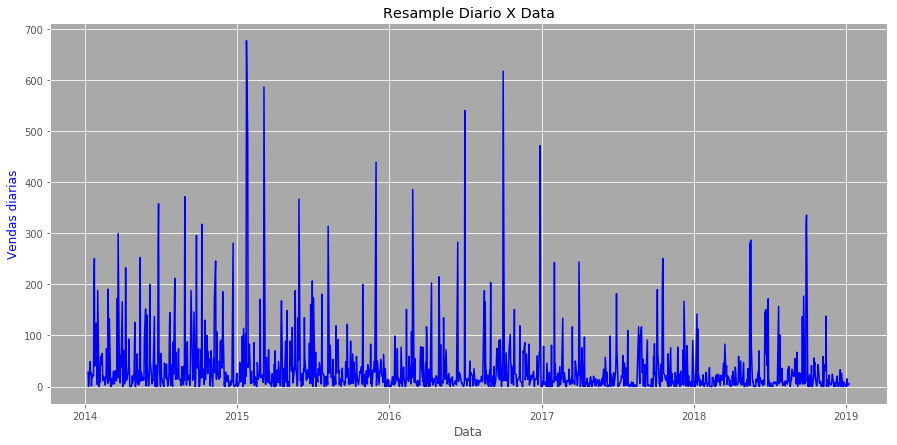

In [5]:
################### plot diario ############ 
fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()
ax1.plot(df.index, df['QtdVendas'], 'b-')
plt.title('Resample Diario X Data') #adicionando o título

ax1.set_xlabel('Data')
ax1.set_ylabel('Vendas diarias', color='b')
ax1.set_facecolor('#A9A9A9')

plt.show()
plt.rcParams['figure.figsize'] = (15,7)

In [118]:
result

(-31.825420539179376,
 0.0,
 0,
 1304,
 {'1%': -3.435374708138995,
  '5%': -2.863758995766637,
  '10%': -2.5679514065499265},
 14275.004003428721)

In [119]:
##### CHECANDO SE A SERIE É ESTACIONARIA
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(df['QtdVendas'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
 
############ A SERIE É ESTACIONARIA, POIS O P-VALUE < 0.05

ADF Statistic: -31.825421
p-value: 0.000000


In [120]:
####   ADF STATISTIC NEGATIVE: Running the example prints the test statistic value of -4.8. The more negative this statistic, 
#the more likely we are to reject the null hypothesis (we have a stationary dataset).
pValue = result[1]
print('{:e}'.format(pValue))
if( pValue == 0 ):
    print(" ")

0.000000e+00
 


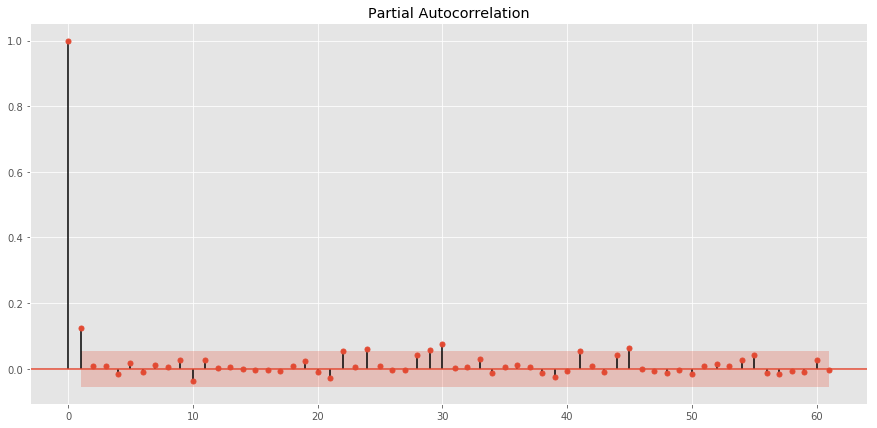

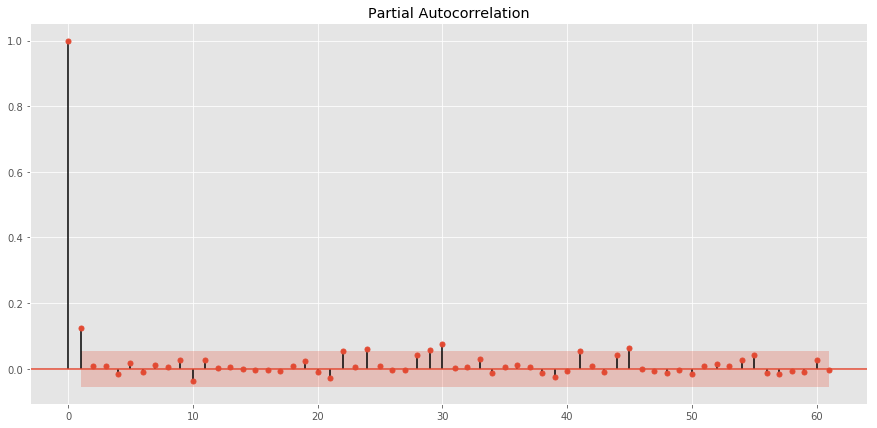

In [121]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['QtdVendas'], lags=61)

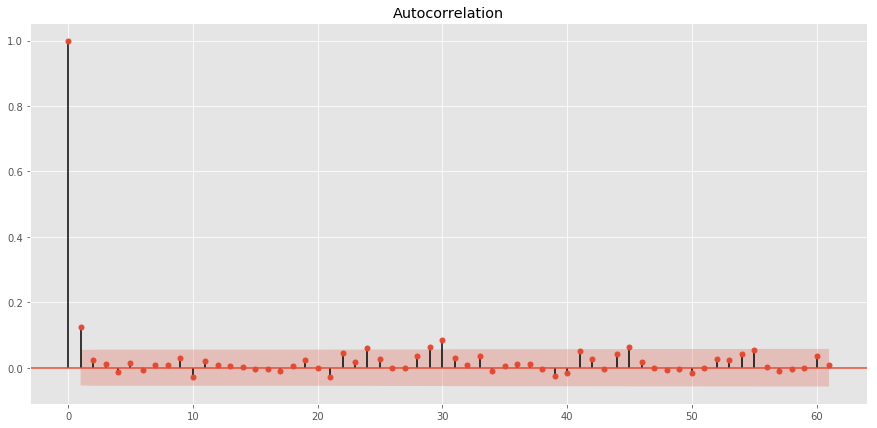

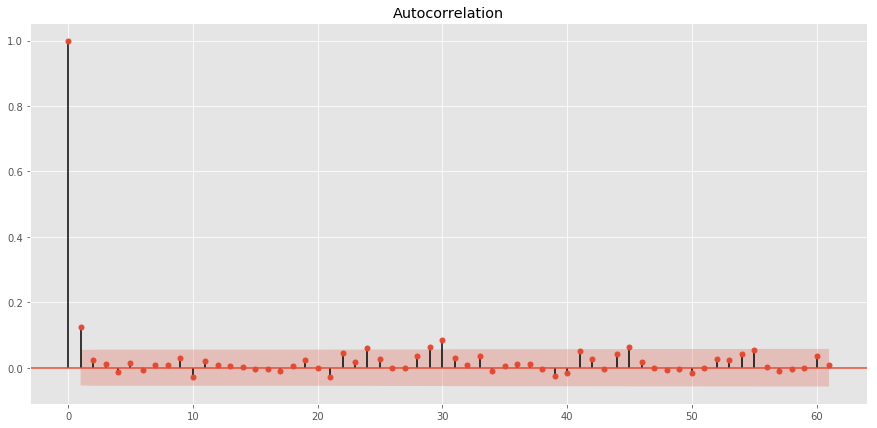

In [122]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['QtdVendas'], lags=61)

In [9]:
df.shape

(1305, 10)

## Arima MODEL

In [95]:
from statsmodels.tsa.arima_model import ARIMA

In [123]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(2, 1, 2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

13149.16002996724


In [97]:
predictions= model_arima_fit.forecast(steps=130)[0]
predictions

array([20.41943813, 21.4605896 , 21.21735968, 20.95960836, 20.46106155,
       20.35123728, 20.32925187, 20.31813505, 20.31265189, 20.29180066,
       20.26594985, 20.23917054, 20.21227264, 20.1860111 , 20.16001392,
       20.1340778 , 20.10814425, 20.08218341, 20.05620909, 20.03023116,
       20.00425312, 19.97827627, 19.95230011, 19.92632414, 19.90034818,
       19.87437217, 19.84839613, 19.82242007, 19.79644402, 19.77046796,
       19.74449191, 19.71851586, 19.69253981, 19.66656376, 19.64058771,
       19.61461165, 19.5886356 , 19.56265955, 19.5366835 , 19.51070745,
       19.4847314 , 19.45875535, 19.43277929, 19.40680324, 19.38082719,
       19.35485114, 19.32887509, 19.30289904, 19.27692299, 19.25094694,
       19.22497088, 19.19899483, 19.17301878, 19.14704273, 19.12106668,
       19.09509063, 19.06911458, 19.04313852, 19.01716247, 18.99118642,
       18.96521037, 18.93923432, 18.91325827, 18.88728222, 18.86130616,
       18.83533011, 18.80935406, 18.78337801, 18.75740196, 18.73

In [98]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
#pdq


In [32]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 13177.77777609831
(0, 0, 1) 13165.080286154252
(0, 0, 2) 13166.501493324247
(0, 0, 3) 13168.427264447399
(0, 0, 4) 13169.726793636282
(0, 1, 0) 13840.68542996132
(0, 1, 1) 13155.16935374197
(0, 1, 2) 13145.931792479361
(0, 2, 0) 15079.0945588025
(0, 2, 1) 13838.977939964258
(1, 0, 0) 13164.605951918493
(1, 0, 1) 13166.491790469281
(1, 0, 2) 13168.477625039002
(1, 1, 0) 13578.237913279332
(1, 1, 1) 13145.884798695985
(1, 1, 2) 13147.87142738148
(1, 1, 3) 13149.379746705868
(1, 1, 4) 13150.84711928435
(1, 2, 0) 14459.752361544932
(2, 0, 0) 13166.485084396783
(2, 0, 1) 13168.484879417847
(2, 0, 2) 13170.27628507366
(2, 1, 0) 13467.81000995206
(2, 1, 1) 13147.867641535362
(2, 1, 2) 13149.16002996724
(2, 1, 3) 13151.103838744712
(2, 1, 4) 13147.511604838899
(2, 2, 0) 14149.436695453867
(3, 0, 0) 13168.48391308417
(3, 0, 1) 13169.414013883168
(3, 0, 3) 13172.950760284892
(3, 0, 4) 13167.855737062635
(3, 1, 0) 13414.515054576586
(3, 1, 1) 13149.60106957444
(3, 1, 2) 13146.9362548210

## Aplicando e comparando os melhores modelos - (3,1,3),(4,1,1),(2,1,4),(1,1,1)

In [130]:
##################### melhor modelo ##############################
 
model = ARIMA(train, order=(3, 1, 3))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(130, alpha=0.05)  # 95% conf
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)



In [131]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mae': mae,'rmse':rmse, 
            'corr':corr})

forecast_accuracy(fc, test.values)

{'mae': 21.970874197643273,
 'rmse': 47.76466574569666,
 'corr': 0.13483242421099226}

In [132]:
fc_series.sum()

2362.9727970590966

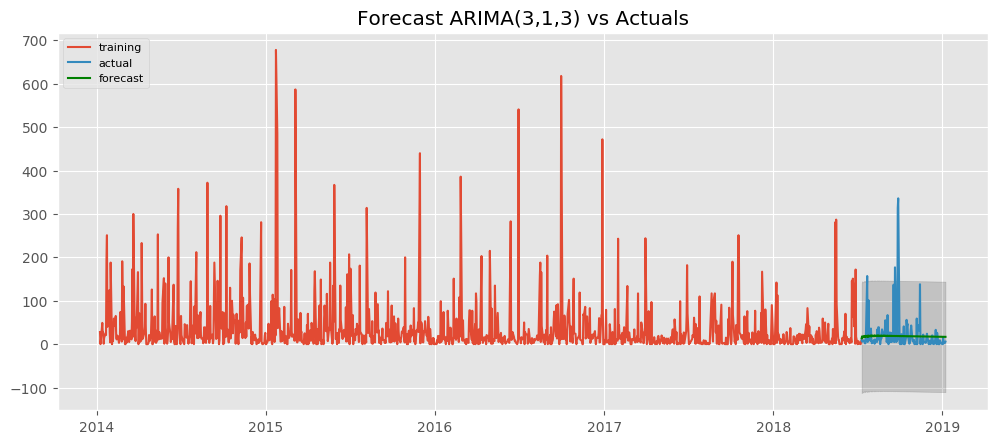

In [133]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast', color = 'g')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast ARIMA(3,1,3) vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

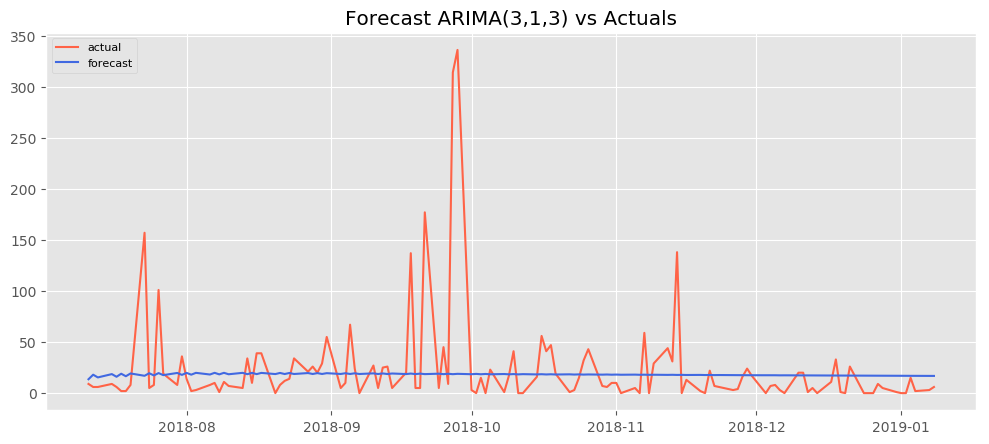

In [134]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train_labels, label='training')
plt.plot(test, label='actual',color ='tomato')
plt.plot(fc_series, label='forecast', color = 'royalblue')
#plt.fill_between(train_labels.index, train_labels, test_labels, #color='k', alpha=.15)
plt.title('Forecast ARIMA(3,1,3) vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [137]:
test.sum()  #2362,97

3033

## Modelo MA

In [145]:
##################### melhor modelo ##############################
 
model = ARIMA(train, order=(0, 0, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(130, alpha=0.05)  # 95% conf
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)



In [148]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mae': mae,'rmse':rmse, 
            'corr':corr})

forecast_accuracy(fc, test.values)

{'mae': 31.757980657994807,
 'rmse': 49.197161214892084,
 'corr': 0.031471253550065095}

In [147]:
fc_series.sum()

4649.196524178571

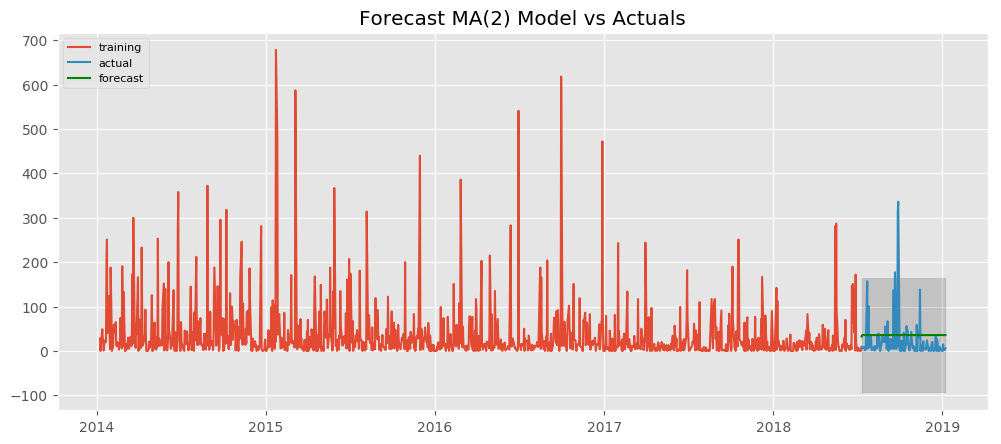

In [141]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast', color = 'g')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast MA(2) Model vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

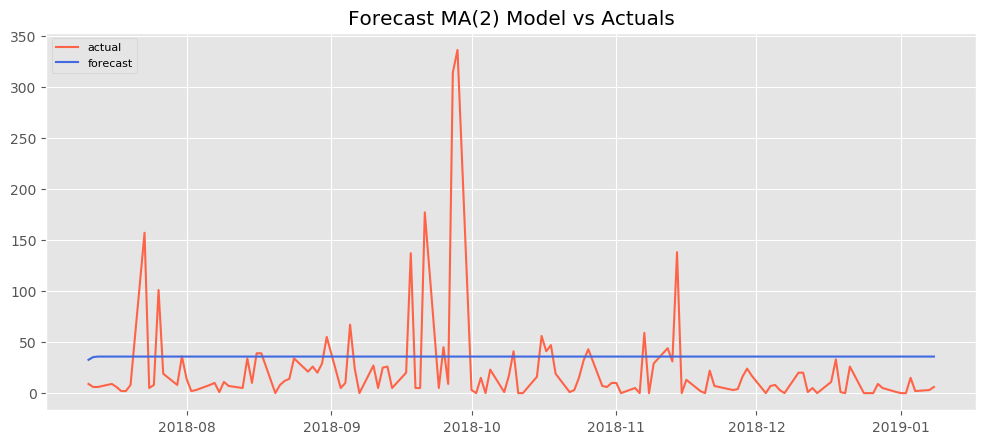

In [142]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train_labels, label='training')
plt.plot(test, label='actual',color ='tomato')
plt.plot(fc_series, label='forecast', color = 'royalblue')
#plt.fill_between(train_labels.index, train_labels, test_labels, #color='k', alpha=.15)
plt.title('Forecast MA(2) Model vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()